In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.concat([
    pd.read_csv(f"results/variance_calculations_{y}.csv", index_col=0)
    for y in [1990,2001,2007,2018]
])

In [4]:
df.date = pd.to_datetime(df.date)
df["Year"] = df.date.dt.year
df["Date"] = df.date.dt.date
df = df.loc[df.rv != 0]
df = df.sort_values(["method", "interval", "Date", "ContractName"], ascending=True)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [5]:
df.head()

,date,ContractName,rv,bv,ssj,interval,method
0,1990-01-02,SPH90,0.000058,0.000058,3.998821e-08,1,naive
1,1990-01-03,SPH90,0.000071,0.000073,0.000000e+00,1,naive
2,1990-01-04,SPH90,0.000092,0.000082,9.688206e-06,1,naive
3,1990-01-05,SPH90,0.000118,0.000116,2.529174e-06,1,naive
4,1990-01-08,SPH90,0.000058,0.000053,5.243289e-06,1,naive


In [ ]:
annual_vols = np.sqrt(df.groupby(["Year", "interval", "method"]).bv.sum()).to_frame().reset_index()
annual_vols.loc[(annual_vols.method=="subsampling") & annual_vols.interval.isin([1,5,10,15,30,60,90])].pivot(index="Year", columns="interval", values="bv")

interval,1,5,10,15,30,60,90
Year,,,,,,,
2001.0,0.180715,0.079696,0.055311,0.044798,0.030468,0.019940,0.015161
2007.0,0.127745,0.056224,0.039284,0.031871,0.021742,0.014317,0.010936
2018.0,0.123344,0.054270,0.037929,0.030689,0.020953,0.013817,0.010645


In [ ]:
rdf = df.melt(id_vars=["Date", "ContractName", "Year", "interval", "method"], value_vars=["rv", "bv", "ssj"], var_name="variance_type", value_name="estimate")

In [ ]:
#_df = df.loc[(df.method=="subsampling")]
_df = df.loc[df.interval.isin([1,3,5,10,15,20,30,60])]
_df = _df.loc[~_df.duplicated(["method", "interval", "Date"], keep="last"), :]
_df = _df.reset_index(drop=True)

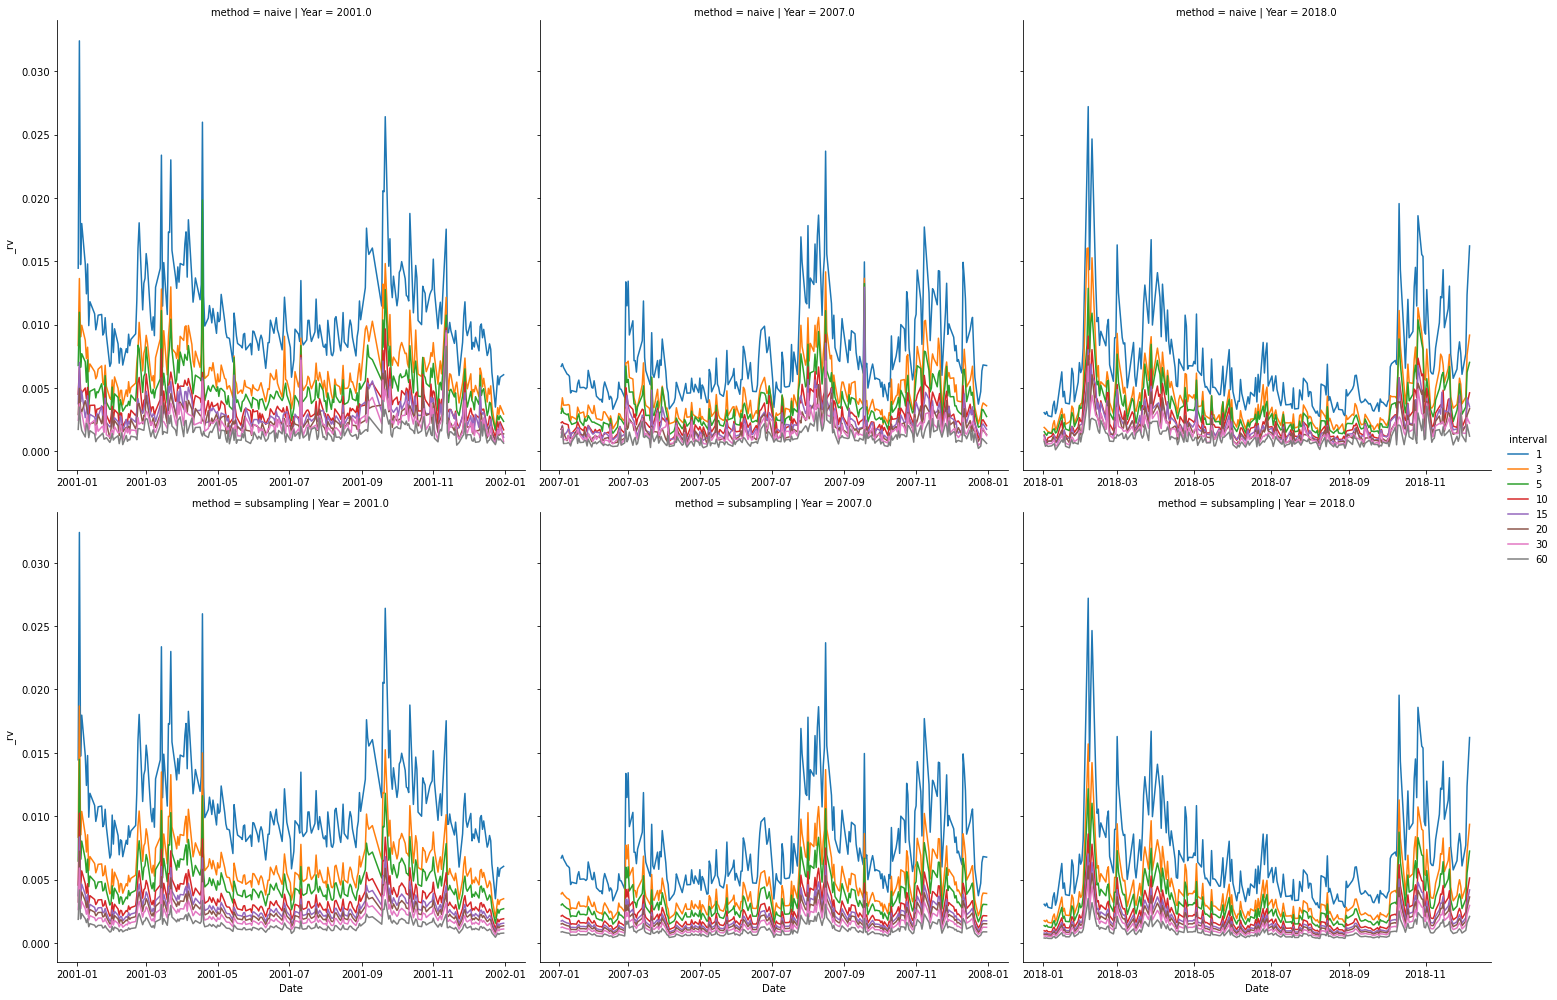

In [ ]:
_df["_rv"] = np.sqrt(_df["rv"])
g = sns.FacetGrid(data=_df, row="method", col="Year",  hue="interval", sharex=False, height=7)
g.map_dataframe(sns.lineplot, x="Date", y="_rv", legend="full")
g.add_legend()

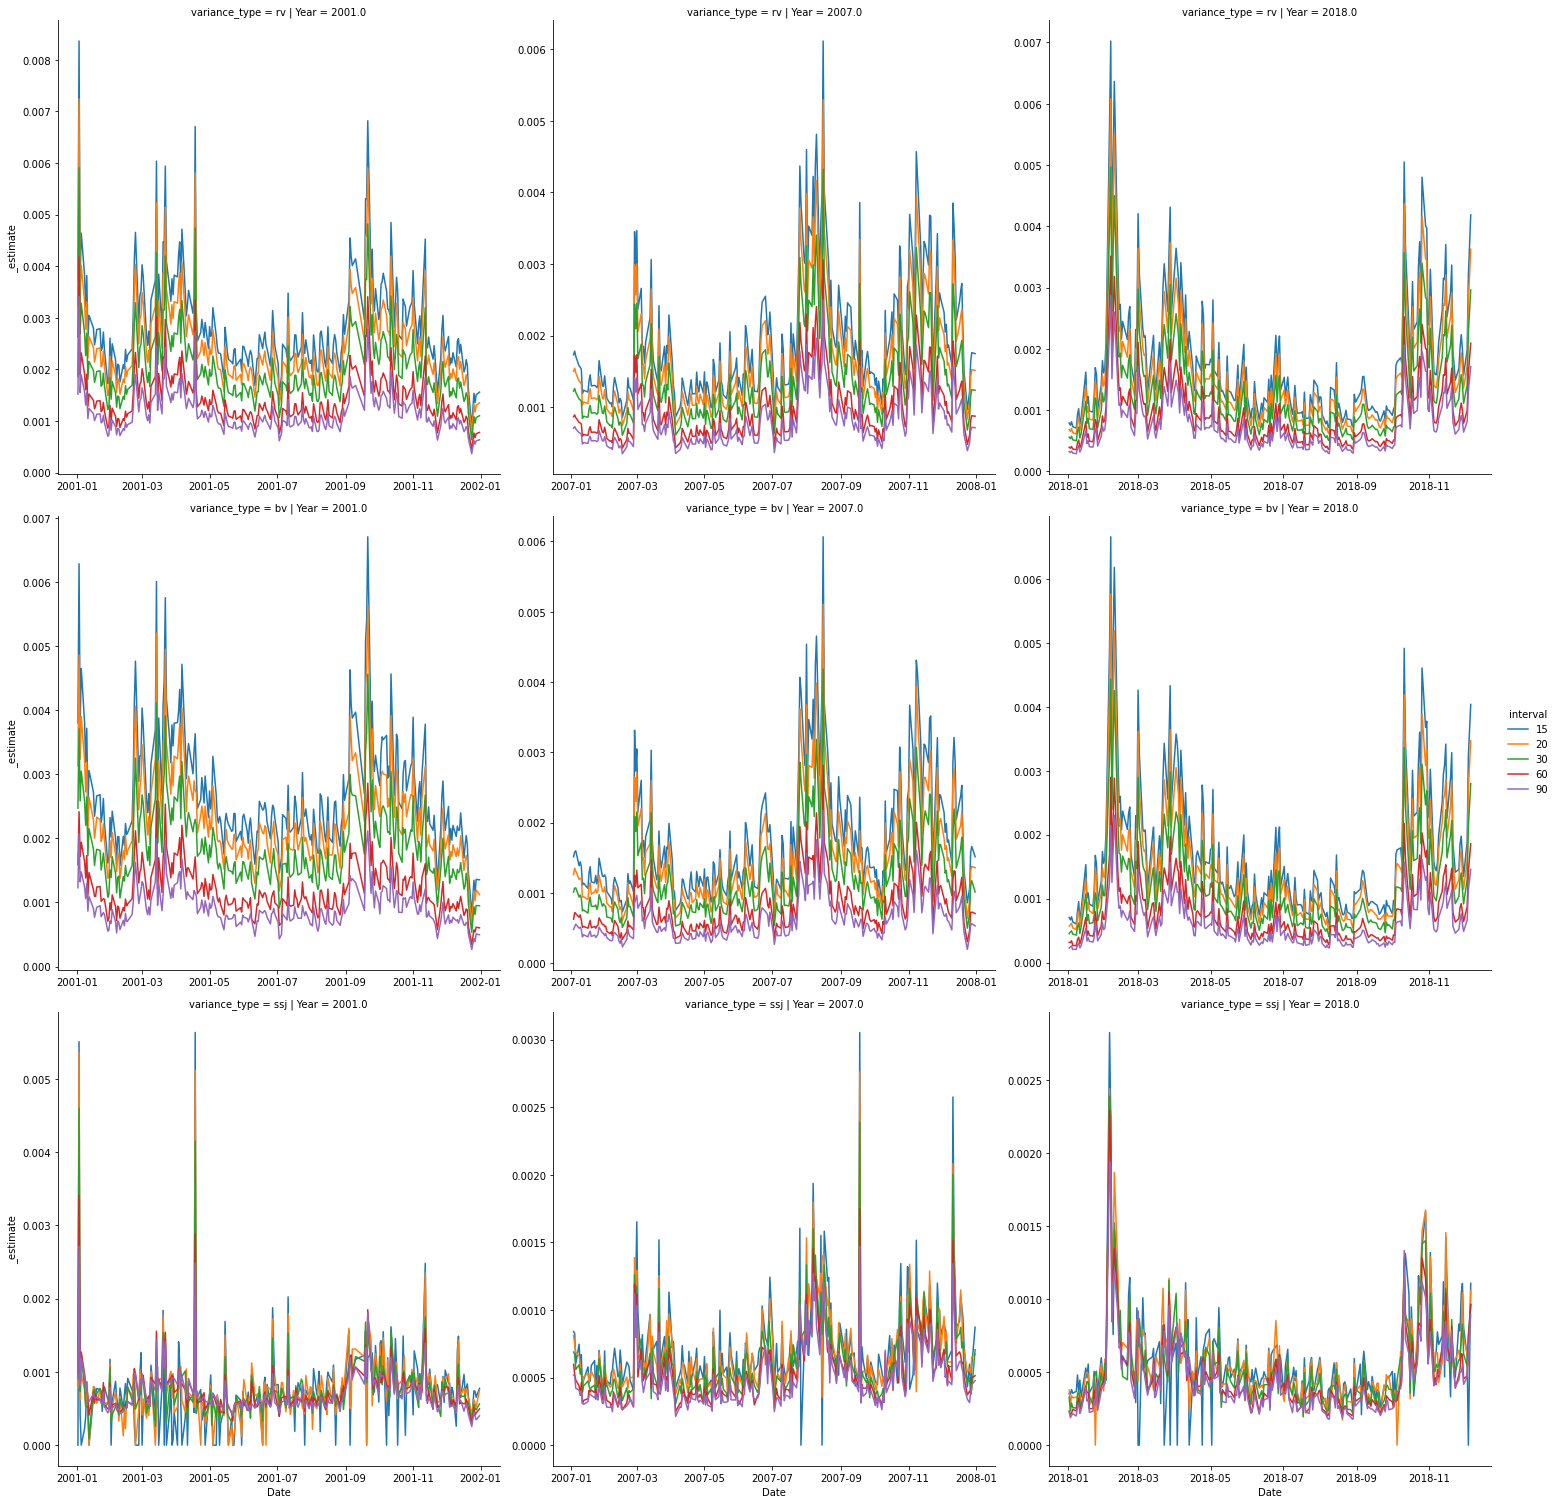

In [ ]:
rdf["_estimate"] = np.sqrt(rdf["estimate"])
srdf = rdf.loc[rdf.method=="subsampling"]
g = sns.FacetGrid(data=srdf.loc[srdf.interval.isin([15,20,30,60,90])], row="variance_type", col="Year", hue="interval", sharex=False, sharey=False, height=7)
g.map_dataframe(sns.lineplot, x="Date", y="_estimate", legend="full")
g.add_legend()

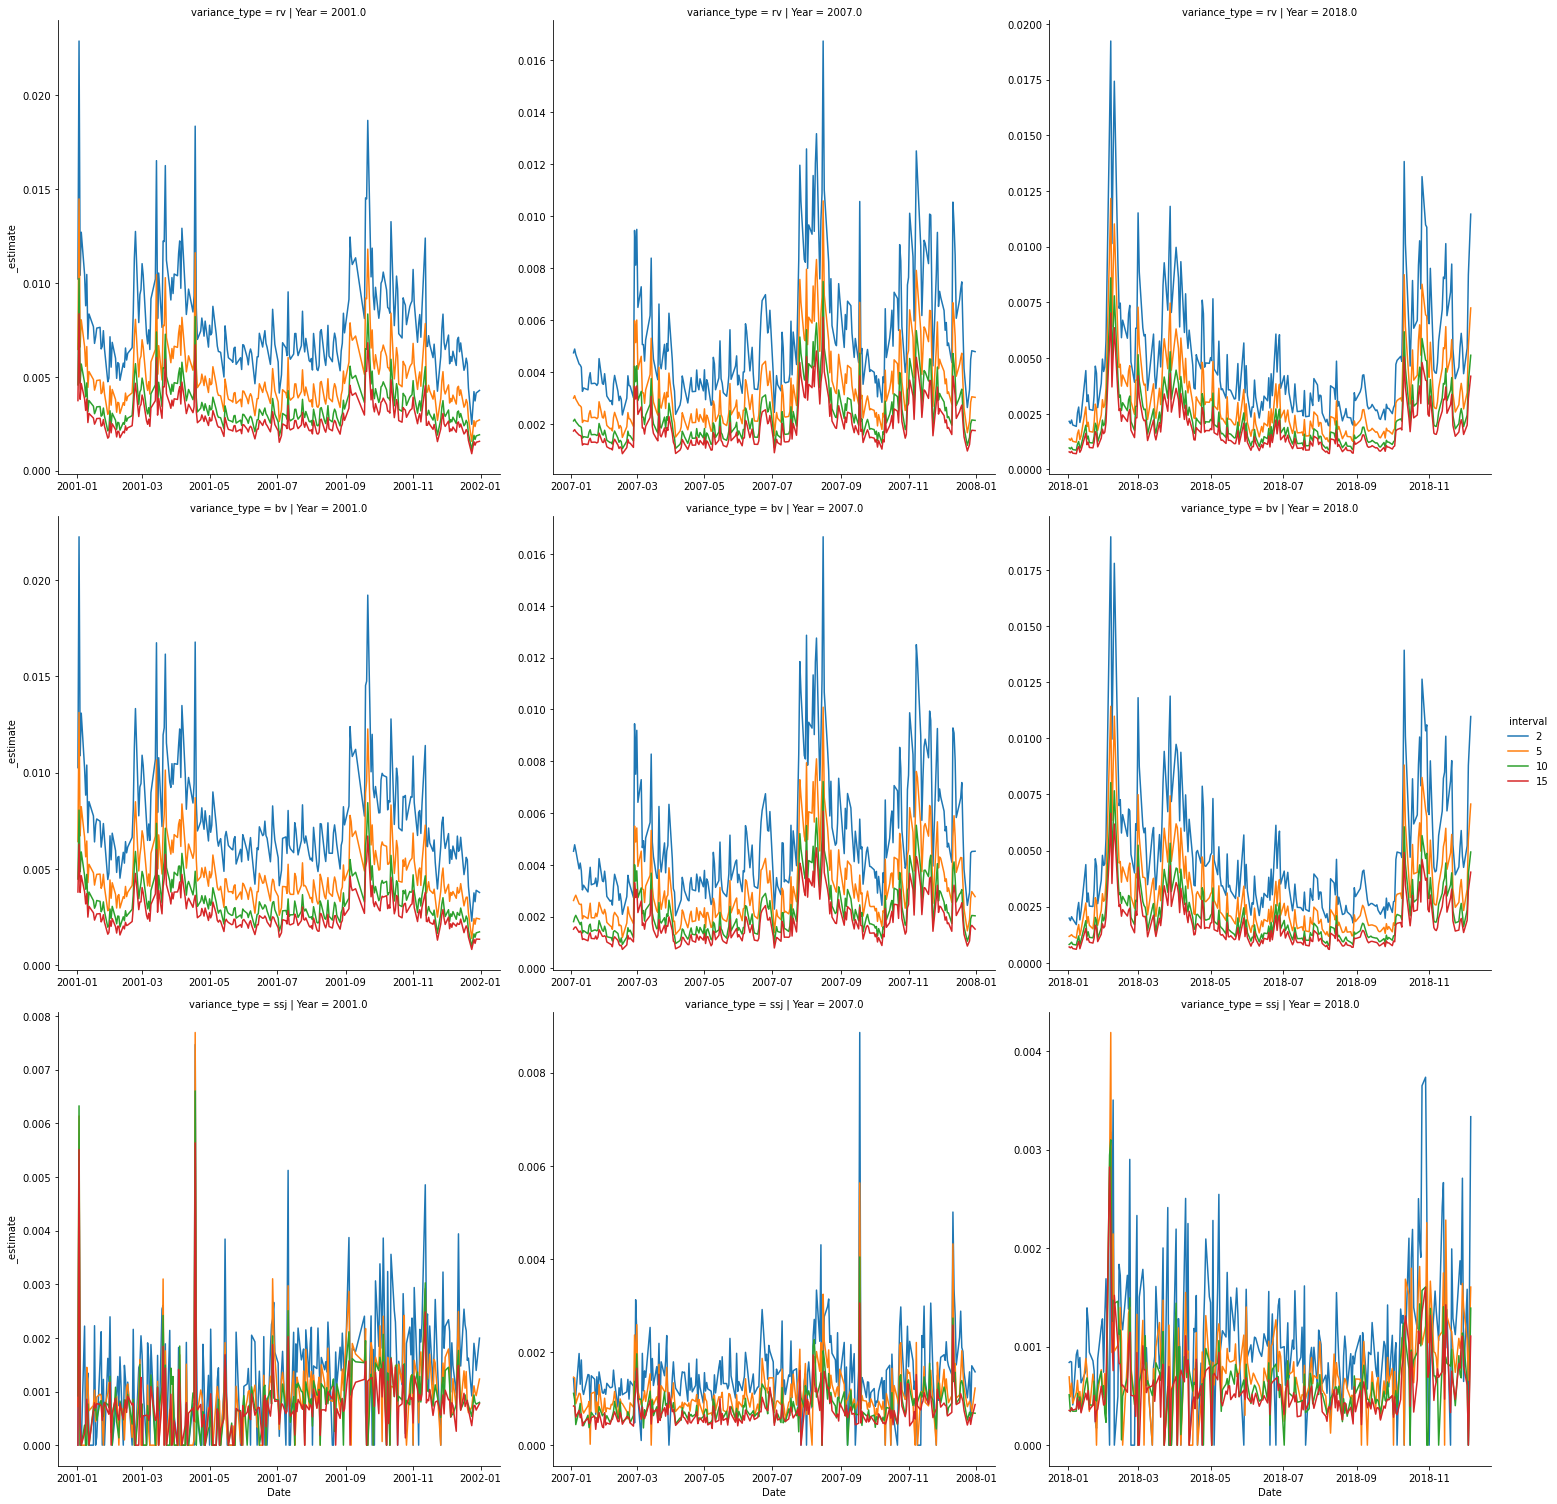

In [ ]:
rdf["_estimate"] = np.sqrt(rdf["estimate"])
srdf = rdf.loc[rdf.method=="subsampling"]
g = sns.FacetGrid(data=srdf.loc[srdf.interval.isin([2, 5,10,15])], row="variance_type", col="Year", hue="interval", sharex=False, sharey=False, height=7)
g.map_dataframe(sns.lineplot, x="Date", y="_estimate", legend="full")
g.add_legend()

In [ ]:
_df = df.loc[df["method"] == "naive", ["Date", "ContractName", "interval", "rv"]]
_df["_Date"] = _df["Date"].apply(lambda x: x.toordinal())


ValueError: NaTType does not support toordinal

In [ ]:
_df

,Date,ContractName,interval,rv,_Date
0,1990-01-02,SPH90,1,5.784871e-05,726469
1,1990-01-03,SPH90,1,7.127091e-05,726470
2,1990-01-04,SPH90,1,9.171463e-05,726471
3,1990-01-05,SPH90,1,1.182479e-04,726472
4,1990-01-08,SPH90,1,5.800100e-05,726475
...,...,...,...,...,...
227,2018-11-29,ESZ18,90,1.744298e-06,737027
228,2018-11-30,ESZ18,90,4.655903e-07,737028
229,2018-12-03,ESZ18,90,6.385447e-07,737031
230,2018-12-04,ESZ18,90,3.743190e-06,737032


<AxesSubplot:xlabel='Date', ylabel='interval'>

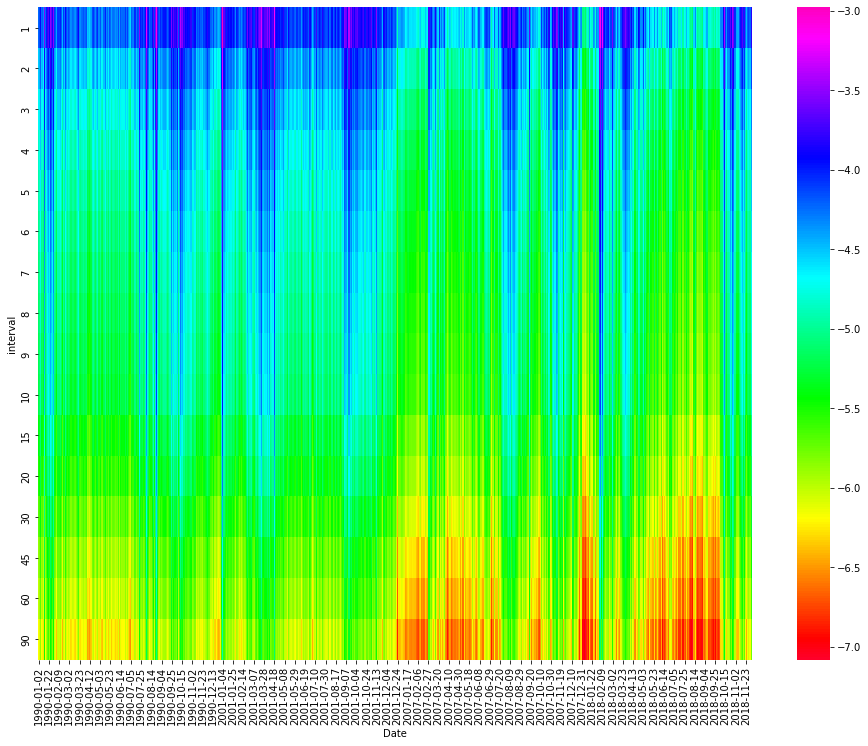

In [ ]:
_df = df.loc[(df.method=="subsampling")]
#_df = df.loc[df.interval.isin([1,3, 5,10,15,20,30,60])]
_df = _df.loc[~_df.duplicated(["method", "interval", "Date"], keep="last"), :]
_df = _df.reset_index(drop=True)
__df = _df.pivot("interval", "Date", "rv")

plt.subplots(figsize=(16, 12))
sns.heatmap(np.log10(__df), cmap="gist_rainbow")


In [ ]:
qq = _df.groupby("interval").quantile(q=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

In [ ]:
qq = qq.reset_index()

In [ ]:
qq = qq.rename(columns = {"level_1":"quantile"})
qq["rvol"] = np.sqrt(qq["rv"])

<AxesSubplot:xlabel='interval', ylabel='rvol'>

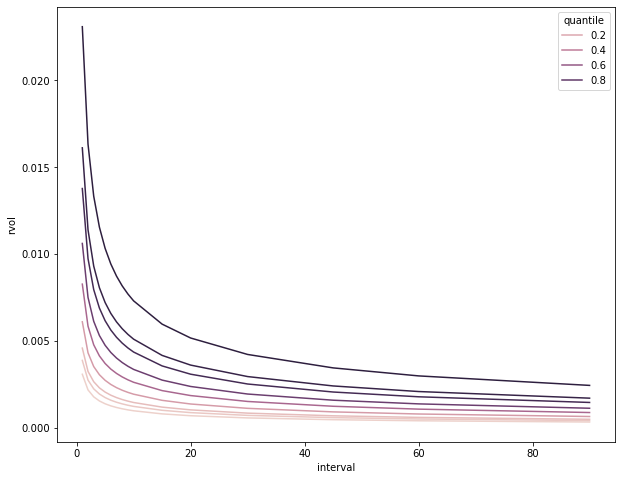

In [ ]:
plt.subplots(figsize=(10, 8))
sns.lineplot(data=qq, x="interval", hue="quantile", y="rvol")


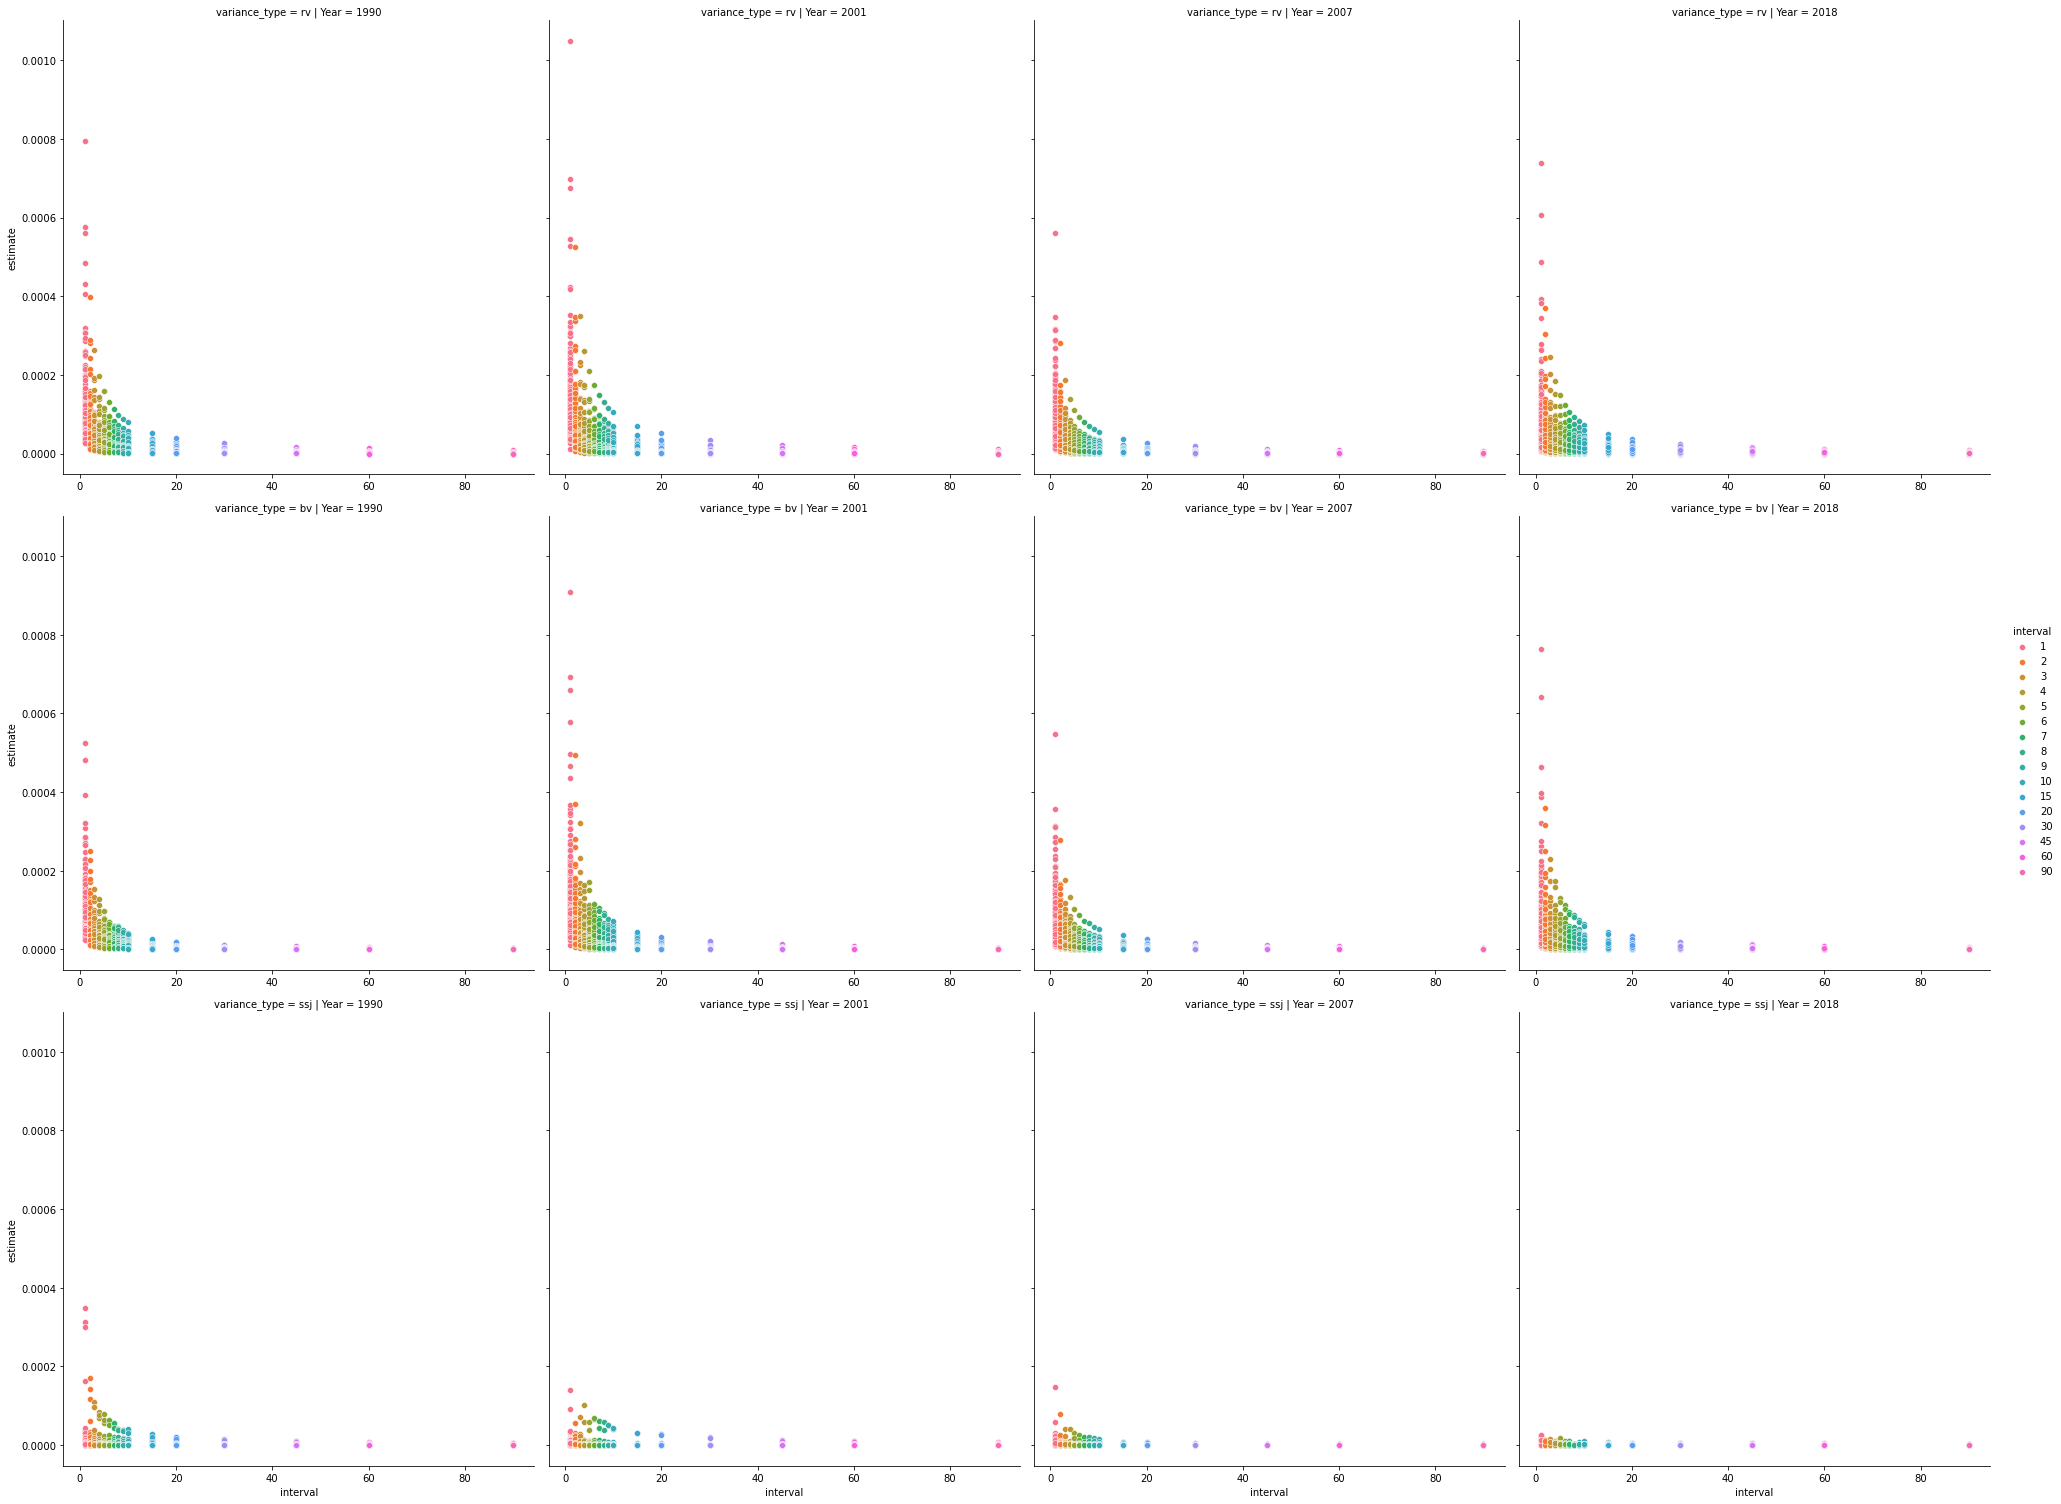

In [ ]:
rdf["_estimate"] = np.sqrt(rdf["estimate"])
srdf = rdf.loc[rdf.method=="subsampling"]
g = sns.FacetGrid(data=srdf, row="variance_type", col="Year", hue="interval", sharex=False, height=7)
g.map_dataframe(sns.scatterplot, x="interval", y="estimate", legend="full")
g.add_legend()

Time step : 5, 10, 15, 20, 25, 30 minutes à chaque fois pour tous nos résultats 
Graphique des variances quadratiques, des bivariances et des sauts pour chacune des années 
